### 특징 벡터의 파라미터로 들어갈 features (단일값 산출이 가능한 것 위주로 선정)
- **MFCC**
- **tempo**(global tempo)
- **spectral centroid**
- **spectral roll-off**
- spectral valley => zero-crossing rate로 대체
- spectral spread (분산 범위)(구하는 법 아직 못찾음)
- spectral flux (구하는 법 아직 못찾음)

In [20]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture as ax
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralClustering
from sklearn.metrics.cluster import adjusted_rand_score
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
#import mglearn
import seaborn as sns

# 1. 벡터 차원 축소
## 1) Feature Selection

In [5]:
#첫번째 클러스터링(tempogram의 전체 평균값을 tempo 변수의 값으로 사용)
df = pd.read_csv("music2.csv")#; df.index.name = 'record' 뭔지몰겠음
cols = ['tempo','centroid','roll-off','mfcc1','mfcc2','mfcc3','mfcc4','mfcc5','mfcc6','mfcc7','mfcc8','mfcc9','mfcc10','mel1','mel2','mel3','mel4','mel5','mel6','mel7','mel8','mel9','mel10']

x = df[cols]
y = df['category']

svc = SVC(kernel="linear", C=1)
rfe = RFE(estimator=svc, n_features_to_select=2, step=1)
rfe.fit(x,y)

print(cols)
print(rfe.ranking_)

['tempo', 'centroid', 'roll-off', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mel1', 'mel2', 'mel3', 'mel4', 'mel5', 'mel6', 'mel7', 'mel8', 'mel9', 'mel10']
[22 20 21  6  1  2  3  5  9  4 10 18 13 15 16  7  1 12 17 19 14 11  8]


In [19]:
# 두번째 클러스터링 (global tempo를 tempo 변수의 값으로 사용)
# 결론적으로는 실패
df = pd.read_csv("music2.csv")#; df.index.name = 'record' 뭔지몰겠음
cols = ['tempo','centroid','roll-off','mfcc1','mfcc2','mfcc3','mfcc4','mfcc5','mfcc6','mfcc7','mfcc8','mfcc9','mfcc10','mel1','mel2','mel3','mel4','mel5','mel6','mel7','mel8','mel9','mel10']

x = df[cols]
y = df['category']

svc = SVC(kernel="linear", C=1)
rfe = RFE(estimator=svc, n_features_to_select=2, step=1)
rfe.fit(x,y)

print(cols)
print(rfe.ranking_)

['tempo', 'centroid', 'roll-off', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mel1', 'mel2', 'mel3', 'mel4', 'mel5', 'mel6', 'mel7', 'mel8', 'mel9', 'mel10']
[ 1 21 22  4  6  7  9  1 11  5 10 15 13 14 16  3  2  8 12 20 19 18 17]


## 2) PCA

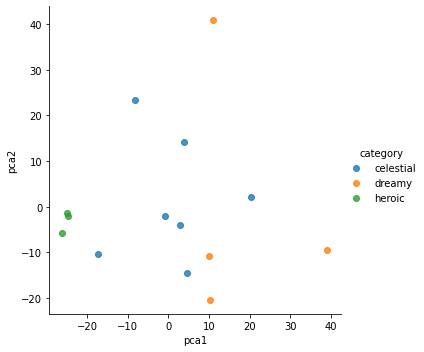

In [9]:
pca1 = PCA(n_components=2)
# Fit the model with X and apply the dimensionality reduction on X.
out_pca1 = pca1.fit_transform(df[['mfcc2','mel4',]])
df_pca1 = pd.DataFrame(data = out_pca1, columns=['pca1','pca2'])
new_df_pca1 = pd.concat([df_pca1, df[['category']]], axis=1)
sns.lmplot(x='pca1', y='pca2', hue='category', data=new_df_pca1, fit_reg=False)

In [21]:
print(pca1.explained_variance_ratio_)

[0.57212748 0.42787252]


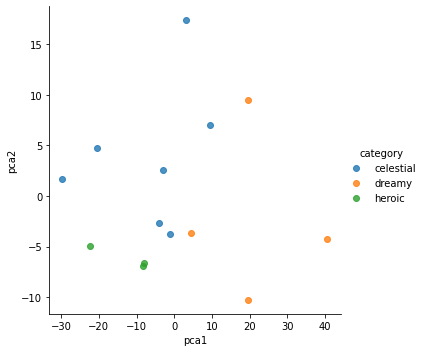

In [22]:
pca2 = PCA(n_components=2)
out_pca2 = pca2.fit_transform(df[['tempo','mfcc5',]])
df_pca2 = pd.DataFrame(data = out_pca2, columns=['pca1','pca2'])
new_df_pca2 = pd.concat([df_pca2, df[['category']]], axis=1)
sns.lmplot(x='pca1', y='pca2', hue='category', data=new_df_pca2, fit_reg=False)

In [13]:
#세번째 클러스터링. 차원 축소 없이 진행
pca3 = PCA()
out_pca3 = pca3.fit_transform(x)
df_pca3 = pd.DataFrame(data = out_pca3) #, columns=['pca1','pca2']
#new_df_pca1 = pd.concat([df_pca1, df[['category']]], axis=1)
#sns.lmplot(x='pca1', y='pca2', hue='category', data=new_df_pca1, fit_reg=False)

# 2. 클러스터링
### K-means

In [11]:
clus1 = KMeans(n_clusters=3, tol=0.004, max_iter=300)
#clus.fit(df.loc[:,'tempo':'mfcc10'])
# Compute k-means clustering.
clus1.fit(df_pca1)
df_pca1['K-Means Cluster Labels'] = clus1.labels_
#print(df['K-Means Cluster Labels'][:5].tolist())
print(df_pca1['K-Means Cluster Labels'])
print("\n")
print(df_pca1)
print("\n")
print(clus1.labels_)

0     2
1     1
2     1
3     1
4     0
5     1
6     2
7     2
8     1
9     1
10    1
11    0
12    0
13    0
Name: K-Means Cluster Labels, dtype: int32


         pca1       pca2  K-Means Cluster Labels
0   -8.280232  23.494560                       2
1    4.621231 -14.501789                       1
2   -0.754424  -2.122258                       1
3    2.880833  -4.007615                       1
4  -17.201813 -10.238500                       0
5   20.331842   2.090475                       1
6    3.905327  14.285077                       2
7   10.992477  40.824689                       2
8    9.946676 -10.827511                       1
9   10.120685 -20.377948                       1
10  39.067510  -9.495601                       1
11 -26.013980  -5.799546                       0
12 -24.968366  -1.344886                       0
13 -24.647766  -1.979146                       0


[2 1 1 1 0 1 2 2 1 1 1 0 0 0]


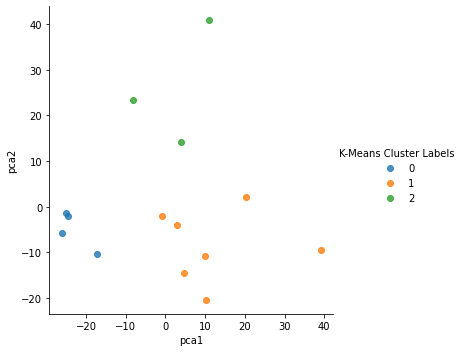

In [12]:
sns.lmplot(x='pca1', y='pca2', hue='K-Means Cluster Labels', data=df_pca1,fit_reg=False)

In [33]:
clus2 = KMeans(n_clusters=3, tol=0.004, max_iter=300)
#clus.fit(df.loc[:,'tempo':'mfcc10'])
# Compute k-means clustering.
clus2.fit(df_pca2)
df_pca2['K-Means Cluster Labels'] = clus2.labels_
#print(df['K-Means Cluster Labels'][:5].tolist())
print(df_pca2['K-Means Cluster Labels'])
print("\n")
print(df_pca2)
print("\n")
print(clus2.labels_)

0     2
1     0
2     2
3     2
4     0
5     2
6     2
7     1
8     1
9     2
10    1
11    0
12    2
13    2
Name: K-Means Cluster Labels, dtype: int32


         pca1       pca2  K-Means Cluster Labels
0   -2.942969   2.607086                       2
1  -20.387342   4.728063                       0
2    3.230954  17.342183                       2
3   -1.215052  -3.744587                       2
4  -29.658004   1.689735                       0
5    9.444874   7.052281                       2
6   -4.049704  -2.641997                       2
7   19.534953   9.466217                       1
8   19.605536 -10.246896                       1
9    4.522335  -3.643184                       2
10  40.604302  -4.209539                       1
11 -22.416931  -4.897986                       0
12  -8.174797  -6.932438                       2
13  -8.098155  -6.568938                       2


[2 0 2 2 0 2 2 1 1 2 1 0 2 2]


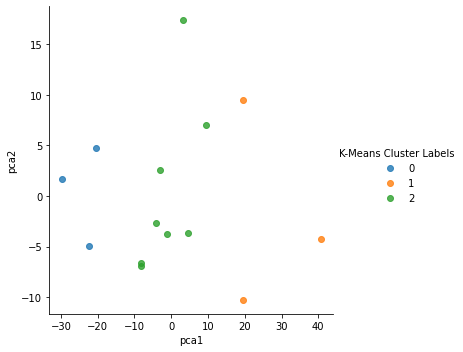

In [34]:
sns.lmplot(x='pca1', y='pca2', hue='K-Means Cluster Labels', data=df_pca2,fit_reg=False)

In [14]:
clus3 = KMeans(n_clusters=3, tol=0.004, max_iter=300)
#clus.fit(df.loc[:,'tempo':'mfcc10'])
# Compute k-means clustering.
clus3.fit(df_pca3)
df_pca3['K-Means Cluster Labels'] = clus3.labels_
#print(df['K-Means Cluster Labels'][:5].tolist())
print(df_pca3['K-Means Cluster Labels'])
print("\n")
print(df_pca3)
print("\n")
print(clus3.labels_)

0     2
1     1
2     2
3     2
4     1
5     2
6     2
7     0
8     2
9     2
10    0
11    1
12    1
13    1
Name: K-Means Cluster Labels, dtype: int32


             0          1          2          3          4          5  \
0     3.549981 -33.554033   9.246818   2.211651  -6.111138   0.744708   
1   -44.814552   1.076950 -18.359441 -13.013334 -10.491616  -7.305008   
2    16.172213  16.229506 -11.266164  38.657156  -5.169964   2.218139   
3    -8.376119  -1.526899  -2.681622  -7.870601   2.466022  -2.164947   
4   -89.379526   5.777576  -1.554484   4.756478  -2.203798  -0.013115   
5    61.058163  -7.891301 -21.510094   7.187695  14.460697  -3.873349   
6    11.717760 -28.254701  -5.802629  -9.216923  -2.120302  11.703236   
7   138.041141 -35.070822  24.969395   4.767042  -1.413917  -5.293506   
8    46.098040  38.916352  17.633103  -7.548722   1.354874  -0.405839   
9    24.430328  46.785043   7.040747  -5.870647  -0.001930  -0.072056   
10  112.994882  11.663217 -19.834860 -13

### Agglomerative clustering

pca1       pca2  HCA Cluster Labels
0   -8.280232  23.494560                   2
1    4.621231 -14.501789                   0
2   -0.754424  -2.122258                   0
3    2.880833  -4.007615                   0
4  -17.201813 -10.238500                   1
5   20.331842   2.090475                   0
6    3.905327  14.285077                   2
7   10.992477  40.824689                   2
8    9.946676 -10.827511                   0
9   10.120685 -20.377948                   0
10  39.067510  -9.495601                   0
11 -26.013980  -5.799546                   1
12 -24.968366  -1.344886                   1
13 -24.647766  -1.979146                   1


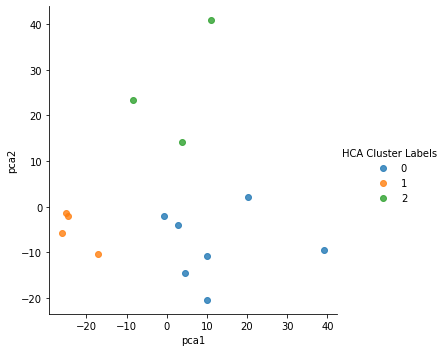

In [35]:
# linkage{“ward”, “complete”, “average”, “single”}
# Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion.
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html
clus1 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
# clus.fit(df.loc[:,'tempo':'mfcc10'])
new_df_pca1 = df_pca1.loc[:,'pca1':'pca2']
clus1.fit(new_df_pca1)
new_df_pca1['HCA Cluster Labels'] = clus1.labels_
print(new_df_pca1)
sns.lmplot(x='pca1',y='pca2',hue='HCA Cluster Labels',data=new_df_pca1,fit_reg=False)

{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [5.0, 5.0, 22.5, 22.5],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [75.0, 75.0, 85.0, 85.0],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [80.0, 80.0, 102.5, 102.5],
  [125.0, 125.0, 135.0, 135.0],
  [91.25, 91.25, 130.0, 130.0],
  [52.5, 52.5, 110.625, 110.625],
  [13.75, 13.75, 81.5625, 81.5625]],
 'dcoord': [[0.0, 0.7106827813225046, 0.7106827813225046, 0.0],
  [0.0, 4.9763955752929, 4.9763955752929, 0.7106827813225046],
  [0.0, 13.18708971373479, 13.18708971373479, 4.9763955752929],
  [0.0, 15.274240700944995, 15.274240700944995, 0.0],
  [0.0, 29.54880909096417, 29.54880909096417, 15.274240700944995],
  [0.0, 4.095077747076358, 4.095077747076358, 0.0],
  [0.0, 6.469983714888469, 6.469983714888469, 0.0],
  [0.0, 9.489785143960667, 9.489785143960667, 6.469983714888469],
  [4.095077747076358,
   21.880672090272746,
   21.880672090272746,
   9.489785143960667],
  [0.0, 22.0286731334154

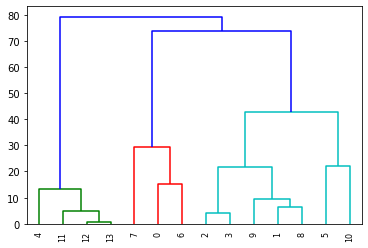

In [11]:
temp_df = df_pca.loc[:,'pca1':'pca2']
z = hierarchy.linkage(temp_df,'ward')
hierarchy.dendrogram(z, leaf_rotation=90, leaf_font_size=8, labels=temp_df.index)

pca1       pca2  HCA Cluster Labels
0   -2.942969   2.607086                   0
1  -20.387342   4.728063                   2
2    3.230954  17.342183                   0
3   -1.215052  -3.744587                   0
4  -29.658004   1.689735                   2
5    9.444874   7.052281                   0
6   -4.049704  -2.641997                   0
7   19.534953   9.466217                   0
8   19.605536 -10.246896                   1
9    4.522335  -3.643184                   0
10  40.604302  -4.209539                   1
11 -22.416931  -4.897986                   2
12  -8.174797  -6.932438                   0
13  -8.098155  -6.568938                   0


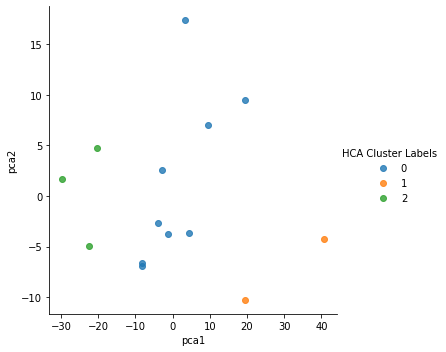

In [37]:
clus2 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
# clus.fit(df.loc[:,'tempo':'mfcc10'])
new_df_pca2 = df_pca2.loc[:,'pca1':'pca2']
clus2.fit(new_df_pca2)
new_df_pca2['HCA Cluster Labels'] = clus2.labels_
print(new_df_pca2)
sns.lmplot(x='pca1',y='pca2',hue='HCA Cluster Labels',data=new_df_pca2,fit_reg=False)

In [15]:
clus3 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
del df_pca3['K-Means Cluster Labels']
#new_df_pca1 = df_pca1[cols]
clus3.fit(df_pca3)
df_pca3['HCA Cluster Labels'] = clus1.labels_
print(df_pca3)
#sns.lmplot(x='mfcc2',y='mel3',hue='HCA Cluster Labels',data=new_df_pca1,fit_reg=False)

0          1          2          3          4          5  \
0     3.549981 -33.554033   9.246818   2.211651  -6.111138   0.744708   
1   -44.814552   1.076950 -18.359441 -13.013334 -10.491616  -7.305008   
2    16.172213  16.229506 -11.266164  38.657156  -5.169964   2.218139   
3    -8.376119  -1.526899  -2.681622  -7.870601   2.466022  -2.164947   
4   -89.379526   5.777576  -1.554484   4.756478  -2.203798  -0.013115   
5    61.058163  -7.891301 -21.510094   7.187695  14.460697  -3.873349   
6    11.717760 -28.254701  -5.802629  -9.216923  -2.120302  11.703236   
7   138.041141 -35.070822  24.969395   4.767042  -1.413917  -5.293506   
8    46.098040  38.916352  17.633103  -7.548722   1.354874  -0.405839   
9    24.430328  46.785043   7.040747  -5.870647  -0.001930  -0.072056   
10  112.994882  11.663217 -19.834860 -13.328476  -2.035337   3.799174   
11  -76.071564  13.462441  17.446430   3.490890  -0.945677   1.482699   
12  -88.274811  -6.715344   9.749615  -1.870532  10.598081   3.2

{'icoord': [[35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [15.0, 15.0, 32.5, 32.5],
  [5.0, 5.0, 23.75, 23.75],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [125.0, 125.0, 135.0, 135.0],
  [115.0, 115.0, 130.0, 130.0],
  [92.5, 92.5, 122.5, 122.5],
  [62.5, 62.5, 107.5, 107.5],
  [14.375, 14.375, 85.0, 85.0]],
 'dcoord': [[0.0, 25.56454089248945, 25.56454089248945, 0.0],
  [0.0, 28.703347344860475, 28.703347344860475, 25.56454089248945],
  [0.0, 46.36486161403584, 46.36486161403584, 28.703347344860475],
  [0.0, 70.19618195148689, 70.19618195148689, 46.36486161403584],
  [0.0, 62.44457252059454, 62.44457252059454, 0.0],
  [0.0, 91.13361854476162, 91.13361854476162, 62.44457252059454],
  [0.0, 26.314797304193643, 26.314797304193643, 0.0],
  [0.0, 41.817028089517265, 41.817028089517265, 26.314797304193643],
  [0.0, 28.278004591306303, 28.278004591306303, 0.0],
  [0.0, 70.68131044348544, 70.68131044348544, 2

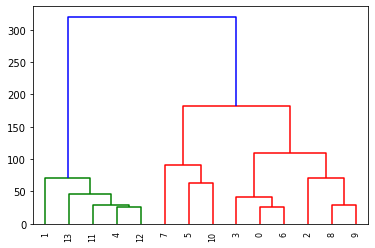

In [17]:
z = hierarchy.linkage(df_pca3,'ward')
hierarchy.dendrogram(z, leaf_rotation=90, leaf_font_size=8, labels=df_pca3.index)

### Spectral Clustering

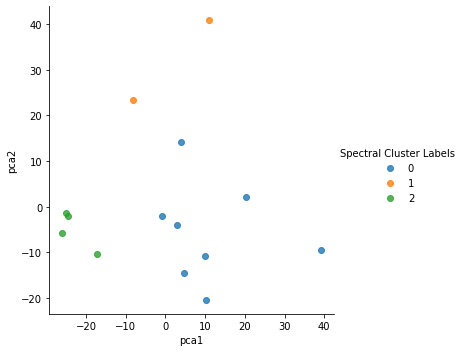

In [40]:
clus1 = SpectralClustering(n_clusters=3, random_state=42, assign_labels='kmeans', n_init=10, affinity='nearest_neighbors', n_neighbors=10)
temp_df1 = df_pca1.loc[:,'pca1':'pca2']
clus1.fit(temp_df1)
temp_df1['Spectral Cluster Labels'] = clus1.labels_
sns.lmplot(x='pca1',y='pca2',hue='Spectral Cluster Labels',data=temp_df1,fit_reg=False)

In [16]:
clus3 = SpectralClustering(n_clusters=3, random_state=42, assign_labels='kmeans', n_init=10, affinity='nearest_neighbors', n_neighbors=10)
#del df_pca1['HCA Cluster Labels']
clus3.fit(df_pca3)
df_pca3['Spectral Cluster Labels'] = clus3.labels_
#sns.lmplot(x='pca1',y='pca2',hue='Spectral Cluster Labels',data=temp_df1,fit_reg=False)
print(df_pca3)

0          1          2          3          4          5  \
0     3.549981 -33.554033   9.246818   2.211651  -6.111138   0.744708   
1   -44.814552   1.076950 -18.359441 -13.013334 -10.491616  -7.305008   
2    16.172213  16.229506 -11.266164  38.657156  -5.169964   2.218139   
3    -8.376119  -1.526899  -2.681622  -7.870601   2.466022  -2.164947   
4   -89.379526   5.777576  -1.554484   4.756478  -2.203798  -0.013115   
5    61.058163  -7.891301 -21.510094   7.187695  14.460697  -3.873349   
6    11.717760 -28.254701  -5.802629  -9.216923  -2.120302  11.703236   
7   138.041141 -35.070822  24.969395   4.767042  -1.413917  -5.293506   
8    46.098040  38.916352  17.633103  -7.548722   1.354874  -0.405839   
9    24.430328  46.785043   7.040747  -5.870647  -0.001930  -0.072056   
10  112.994882  11.663217 -19.834860 -13.328476  -2.035337   3.799174   
11  -76.071564  13.462441  17.446430   3.490890  -0.945677   1.482699   
12  -88.274811  -6.715344   9.749615  -1.870532  10.598081   3.2

### Bayesian Information Criterion

In [21]:
#range_n_clusters = [2,3,4,5,6]
bics = []
#for i, n_clusters in enumerate(range_n_clusters):
    #clusterer = KMeans(n_clusters=n_clusters, random_state=0)
clusterer = KMeans(n_clusters=3, random_state=0)
cluster_labels = clusterer.fit_predict(df_pca1)

gmm = GaussianMixture(n_components=3)
gmm.fit(df_pca1)
bics.append(gmm.bic(df_pca1))

ax.scatter(df_pca1[:,0], df_pca1[:,1], c=colors)
ax.bar(range_n_clusters, [(bic - min(bics)) / (max(bics) - min(bics)) for bic in bics])

AttributeError: type object 'GaussianMixture' has no attribute 'scatter'

## clustering valuation(군집 모델 평가하기)
###  target value로 clustering 평가하기
agglomerative algorithm의 결과를 실제 정답 cluster와 비교하여 평가할 수 있는 지표는<br>
1. ARIadjusted rand index : 0과 1사이의 값을 제공(그러나 음수가 될 수 있음)<br>
2. NMInormalized mutual information를 가장 많이 사용

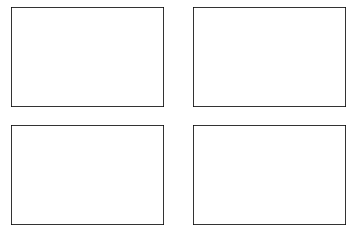

In [57]:
scaler = StandardScaler().fit(x)
x_scaled = scaler.transform(x)
algorithms = [KMeans(n_clusters=2),AgglomerativeClustering(n_clusters=2)]
kmean_pred = algorithms[0].fit_predict(x_scaled)
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(x))
fig, axes = plt.subplots(2, 2,subplot_kw={'xticks':(), 'yticks':()})
